<a href="https://colab.research.google.com/github/hackcoderr/covid-19-symptoms-predictor-web-app/blob/master/ml/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

# EDA

### Getting to know data

In [ ]:
display("Peeking into Data", df)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


### Size of data

In [ ]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


### null values

In [ ]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [ ]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

### Checking distribution of data

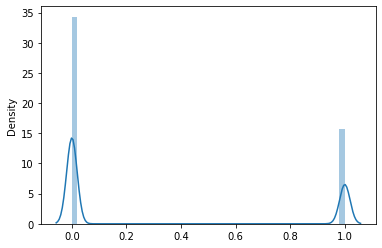

In [ ]:
#df = df.drop('Country',axis=1)
sns.distplot(df.drop('Country',axis=1))

In [ ]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [ ]:
severity_columns = df.filter(like='Severity_').columns

In [ ]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [ ]:
df['Condition']=df[severity_columns].values.tolist()

In [ ]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [ ]:
df['Condition'] = df['Condition'].apply(removing)

### Grouping by severity

In [ ]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

In [ ]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

In [ ]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

In [ ]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

In [ ]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

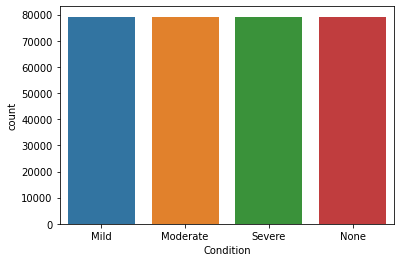

In [ ]:
sns.countplot(df['Condition'])

# Preprocessing

In [ ]:
df.drop("Country",axis=1,inplace=True)

In [ ]:
df.drop(severity_columns,axis=1,inplace=True)

In [ ]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [ ]:
df.shape

(316800, 24)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

In [ ]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,3,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,3,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,2,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,2,0


# Feature Engineering

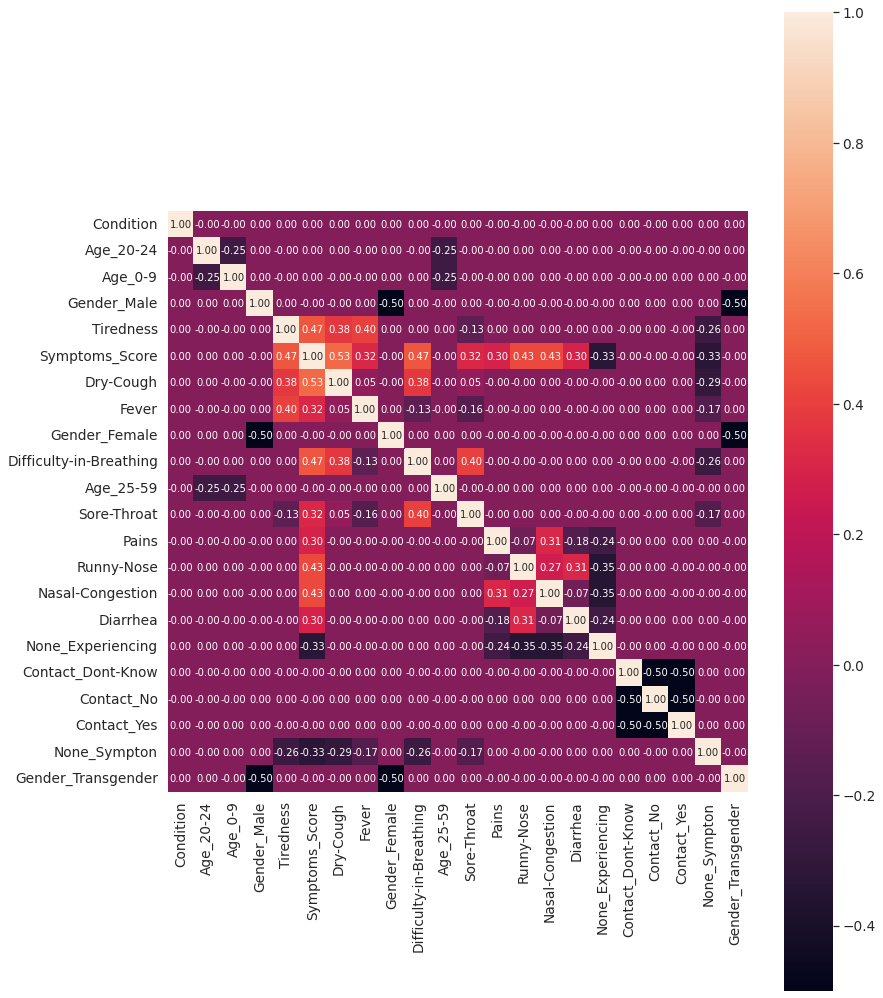

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model

In [ ]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



*   Random Forest



In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n# Create the parameter grid based on the results of random search \nparam_grid = {\n    'n_estimators': [100, 200, 300, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)"

In [ ]:
'''# Fit the grid search to the data
grid_search.fit(X_train, y_train)'''

'# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)'

In [ ]:
'''print('Best Parameters',grid_search.best_params_)
best_grid = grid_search.best_estimator_
print('\n Best Estimator',best_grid)'''

"print('Best Parameters',grid_search.best_params_)\nbest_grid = grid_search.best_estimator_\nprint('\n Best Estimator',best_grid)"

In [ ]:
"""Best Parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Best Estimator RandomForestClassifier(max_depth=4, max_features='sqrt')"""

"Best Parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}\nBest Estimator RandomForestClassifier(max_depth=4, max_features='sqrt')"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.23065025252525254


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1755, 1421, 5073, 7726],
       [1968, 1230, 5098, 7613],
       [2016, 1431, 4602, 7708],
       [2037, 1464, 5191, 7027]])



*   Cat Boost



In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=200)

In [ ]:
categorical_var = np.where(X_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [ ]:
model.fit(X_train,y_train,cat_features = categorical_var,plot=False)

Learning rate set to 0.408837
0:	learn: 1.3862142	total: 724ms	remaining: 2m 24s
1:	learn: 1.3861638	total: 1.05s	remaining: 1m 43s
2:	learn: 1.3861440	total: 1.39s	remaining: 1m 31s
3:	learn: 1.3861000	total: 1.75s	remaining: 1m 25s
4:	learn: 1.3860046	total: 2.1s	remaining: 1m 21s
5:	learn: 1.3859796	total: 2.43s	remaining: 1m 18s
6:	learn: 1.3859552	total: 2.77s	remaining: 1m 16s
7:	learn: 1.3859276	total: 3.1s	remaining: 1m 14s
8:	learn: 1.3858819	total: 3.47s	remaining: 1m 13s
9:	learn: 1.3858448	total: 3.82s	remaining: 1m 12s
10:	learn: 1.3857902	total: 4.18s	remaining: 1m 11s
11:	learn: 1.3857512	total: 4.55s	remaining: 1m 11s
12:	learn: 1.3857010	total: 4.91s	remaining: 1m 10s
13:	learn: 1.3856820	total: 5.27s	remaining: 1m 10s
14:	learn: 1.3856065	total: 5.7s	remaining: 1m 10s
15:	learn: 1.3855559	total: 6.12s	remaining: 1m 10s
16:	learn: 1.3855393	total: 6.48s	remaining: 1m 9s
17:	learn: 1.3855137	total: 6.83s	remaining: 1m 9s
18:	learn: 1.3855013	total: 7.15s	remaining: 1m 8

In [ ]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]]


In [ ]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.26465041035353537


In [ ]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [[3]
 [3]
 [3]
 ...
 [1]
 [3]
 [3]]

accuracy_score on test dataset :  0.19139835858585857


*  Logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2401199494949495

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)'''

'from sklearn.neighbors import KNeighborsClassifier\n\nknn = KNeighborsClassifier(n_neighbors=23)\nknn.fit(X_train, y_train)'

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)'''

'from sklearn.neighbors import KNeighborsClassifier\n\nknn = KNeighborsClassifier(n_neighbors=23)\nknn.fit(X_train, y_train)'

In [ ]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)'''

'from sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred_knn)'

In [ ]:
'''from sklearn.svm import SVC

svm = SVC(kernel='linear',C=0.025, random_state=101)

svm.fit(X_train, y_train)'''

"from sklearn.svm import SVC\n\nsvm = SVC(kernel='linear',C=0.025, random_state=101)\n\nsvm.fit(X_train, y_train)"

In [ ]:
'''y_pred_svc = svc.predict(X_test)'''

'y_pred_svc = svc.predict(X_test)'

In [ ]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)'''

'from sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred_svc)'

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

mb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_mb = mb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_mb)

0.24141414141414141

* Neural Network

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_train.shape

(253440, 4)

In [ ]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [ ]:
model=keras.models.Sequential()
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7920/7920 [==============================] - 23s 3ms/step - loss: 1.3866 - accuracy: 0.2489
Epoch 2/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2502
Epoch 3/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2515
Epoch 4/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2514
Epoch 5/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2497
Epoch 6/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2502
Epoch 7/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2488
Epoch 8/10
7920/7920 [==============================] - 22s 3ms/step - loss: 1.3864 - accuracy: 0.2505
Epoch 9/10
7920/7920 [==============================] - 21s 3ms/step - loss: 1.3864 - accuracy: 0.2488
Epoch 10/10
7920/7920 [==============================] - 21s 3ms/step - l

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])